# Pacotes

In [249]:
# Importando as bibliotecas necessárias
# Biblioteca para operações numéricas avançadas e manipulação de arrays
import numpy as np  

# Biblioteca para manipulação e análise de dados estruturados
import pandas as pd  
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Biblioteca para criação de visualizações gráficas
import matplotlib.pyplot as plt  

# Biblioteca de gráficos
import seaborn as sns 

# Classe do scikit-learn para normalização de dados
from sklearn.preprocessing import StandardScaler  

# Classe do scikit-learn para Análise de Componentes Principais (PCA)
from sklearn.decomposition import PCA  

# Biblioteca para análise fatorial, utilizada em estatística
from factor_analyzer import FactorAnalyzer 

## Funções

In [262]:
def plot_scree_plot(explained_variance, title):
    plt.figure(figsize=(8, 6))
    
    # Criando labels para o eixo x
    x_labels = [f'PC{i}' for i in range(1, len(explained_variance) + 1)]
    
    # Plotando o gráfico
    plt.plot(x_labels, explained_variance, marker='o', linestyle='--')
    
    # Calculando a média da variância explicada para a regra de Kaiser
    kaiser_rule_threshold = np.mean(explained_variance)
    
    # Adicionando a linha horizontal para a regra de Kaiser
    #plt.axhline(y=kaiser_rule_threshold, color='r', linestyle='dashed', label=f'Kaiser rule (mean={kaiser_rule_threshold:.2f})')
    
    # Definindo os labels do eixo x
    plt.xticks(x_labels)
    
    plt.title(f'Scree Plot - {title}')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained')
    
    # Adicionando legenda
    plt.legend()
    
    plt.show()

def plot_loadings(loadings, title):
    loadings.plot(kind='bar', figsize=(12, 6))
    plt.title(f'PCA Loadings - {title}')
    plt.ylabel('Loading Value')
    plt.xlabel('Principal Component')
    plt.show()

def plot_loadings_heatmap(loadings, component_labels, variable_labels):
    plt.figure(figsize=(11, 7))
    sns.heatmap(loadings, annot=True, cmap='viridis',
                yticklabels=component_labels, xticklabels=variable_labels)
    plt.title('PCA Loadings')
    plt.ylabel('Principal Component')
    plt.xlabel('Variable')
    plt.show()

# Função para criar um heatmap dos loadings
def plot_loadings_heatmap(loadings_df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings_df, annot=True, cmap='viridis', center=0)
    plt.title('Heatmap of Factor Loadings')
    plt.xlabel('Variables')
    plt.ylabel('Factors')
    plt.show()

def plot_loadings_heatmap(loadings_df, variaveis):
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(loadings_df, annot=True, cmap='viridis', center=0)
    
    # Configurar os rótulos dos eixos x e y
    ax.set_xticklabels(variaveis, rotation=90)
    ax.set_yticklabels([f'Fator {i+1}' for i in range(loadings_df.shape[0])], rotation=0)
    
    plt.title('Heatmap of Factor Loadings')
    plt.xlabel('Variáveis')
    plt.ylabel('Fatores')
    plt.show()

# Criando funções para extrair informações da PCA
def get_pca_info(pca, columns):
    explained_variance = pca.explained_variance_ratio_
    loadings = pd.DataFrame(pca.components_, columns=columns)
    return explained_variance, loadings

# Função para criar um heatmap dos loadings
def plot_loadings_heatmap_factor(loadings_df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings_df, annot=True, cmap='viridis', center=0)
    plt.title('Heatmap of Factor Loadings')
    plt.xlabel('Variables')
    plt.ylabel('Factors')
    plt.show()

def plot_loadings_heatmap_dimensao(loadings_df, variaveis):
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(loadings_df, annot=True, cmap='viridis', center=0)
    
    # Configurar os rótulos dos eixos x e y
    ax.set_xticklabels(variaveis, rotation=90)
    ax.set_yticklabels([f'Fator {i+1}' for i in range(loadings_df.shape[0])], rotation=0)
    
    plt.title('Heatmap of Factor Loadings')
    plt.xlabel('Variáveis')
    plt.ylabel('Fatores')
    plt.show()

# Dataset

In [ ]:
file_path = 'SES_Rio_de_Janeiro.csv'
data = pd.read_csv(file_path)

# Exploratória rapida

## Describe()

In [251]:
data.describe()

,UF,municipality,code,area_de_ponderacao,N,P_AGUAENC,P_AGUAENCDENTRO,P_AGUAREDE,P_ESGOTOPUB,P_ESGOTOQUAL,P_MATPAREDES,P_OVERCROWDING,P_DESEMP,P_ENSFUND,P_ENSMED,P_ENSSUP,P_FORTRAB,P_FREQESCOLA
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,33.000,4557.000,3304557.000,3304557005100.500,10886.485,99.735,97.810,98.364,90.641,94.721,99.438,5.996,7.139,69.816,53.361,21.219,61.775,87.663
std,0.000,0.000,0.000,57.879,2774.196,0.738,2.579,3.781,11.498,7.516,0.732,3.703,2.418,13.870,18.288,19.334,4.956,7.090
min,33.000,4557.000,3304557.000,3304557005001.000,1256.000,91.194,85.197,66.273,39.141,56.024,96.068,0.000,2.361,30.006,12.238,0.414,46.205,58.763
25%,33.000,4557.000,3304557.000,3304557005050.750,8931.000,99.730,97.005,98.660,86.480,93.290,99.286,2.751,5.447,60.210,40.090,6.391,59.045,83.515
50%,33.000,4557.000,3304557.000,3304557005100.500,10224.000,100.000,98.539,99.508,94.788,97.479,99.619,5.870,6.985,69.774,51.760,14.172,61.512,88.316
75%,33.000,4557.000,3304557.000,3304557005150.250,12420.750,100.000,99.565,99.944,98.612,99.485,100.000,8.396,8.666,79.692,65.780,30.628,64.445,92.549
max,33.000,4557.000,3304557.000,3304557005200.000,30597.000,100.000,100.000,100.000,100.000,100.000,100.000,16.526,13.709,94.893,91.141,72.775,78.509,100.000


## Correlação

In [154]:
df_corr = data[["area_de_ponderacao","N", "P_AGUAENC","P_AGUAENCDENTRO","P_AGUAREDE","P_ESGOTOPUB",
                "P_ESGOTOQUAL","P_MATPAREDES","P_OVERCROWDING", "P_DESEMP","P_ENSFUND","P_ENSMED",
                "P_ENSSUP","P_FORTRAB","P_FREQESCOLA"]].corr()

In [155]:
df_corr

,area_de_ponderacao,N,P_AGUAENC,P_AGUAENCDENTRO,P_AGUAREDE,P_ESGOTOPUB,P_ESGOTOQUAL,P_MATPAREDES,P_OVERCROWDING,P_DESEMP,P_ENSFUND,P_ENSMED,P_ENSSUP,P_FORTRAB,P_FREQESCOLA
area_de_ponderacao,1.000000,0.057504,-0.037872,-0.056797,-0.016041,-0.064239,0.113700,-0.022504,-0.047585,-0.074242,0.053722,0.022069,-0.105111,-0.014317,0.121314
N,0.057504,1.000000,0.060712,0.061679,0.070692,0.096756,0.102131,-0.030960,-0.018352,0.007515,0.003935,-0.002592,-0.014266,-0.132271,0.011907
P_AGUAENC,-0.037872,0.060712,1.000000,0.365497,0.757754,0.523657,0.471843,0.312360,-0.223450,-0.113002,0.243405,0.208218,0.146806,-0.116944,0.142323
P_AGUAENCDENTRO,-0.056797,0.061679,0.365497,1.000000,0.365011,0.290374,0.309683,0.166177,-0.213935,-0.010831,0.266809,0.267102,0.226063,0.003158,0.148490
P_AGUAREDE,-0.016041,0.070692,0.757754,0.365011,1.000000,0.670456,0.650936,0.209920,-0.192802,0.012922,0.184245,0.159210,0.108955,-0.146035,0.131059
P_ESGOTOPUB,-0.064239,0.096756,0.523657,0.290374,0.670456,1.000000,0.925182,0.207285,-0.403800,-0.228461,0.389883,0.369620,0.326727,-0.156045,0.241467
P_ESGOTOQUAL,0.113700,0.102131,0.471843,0.309683,0.650936,0.925182,1.000000,0.249694,-0.472179,-0.243232,0.480841,0.450540,0.366391,-0.161242,0.335164
P_MATPAREDES,-0.022504,-0.030960,0.312360,0.166177,0.209920,0.207285,0.249694,1.000000,-0.323794,-0.148821,0.308814,0.277828,0.207665,-0.152945,0.222497
P_OVERCROWDING,-0.047585,-0.018352,-0.223450,-0.213935,-0.192802,-0.403800,-0.472179,-0.323794,1.000000,0.622318,-0.907916,-0.914937,-0.815562,0.056521,-0.555352
P_DESEMP,-0.074242,0.007515,-0.113002,-0.010831,0.012922,-0.228461,-0.243232,-0.148821,0.622318,1.000000,-0.627937,-0.666094,-0.702262,-0.237267,-0.261661


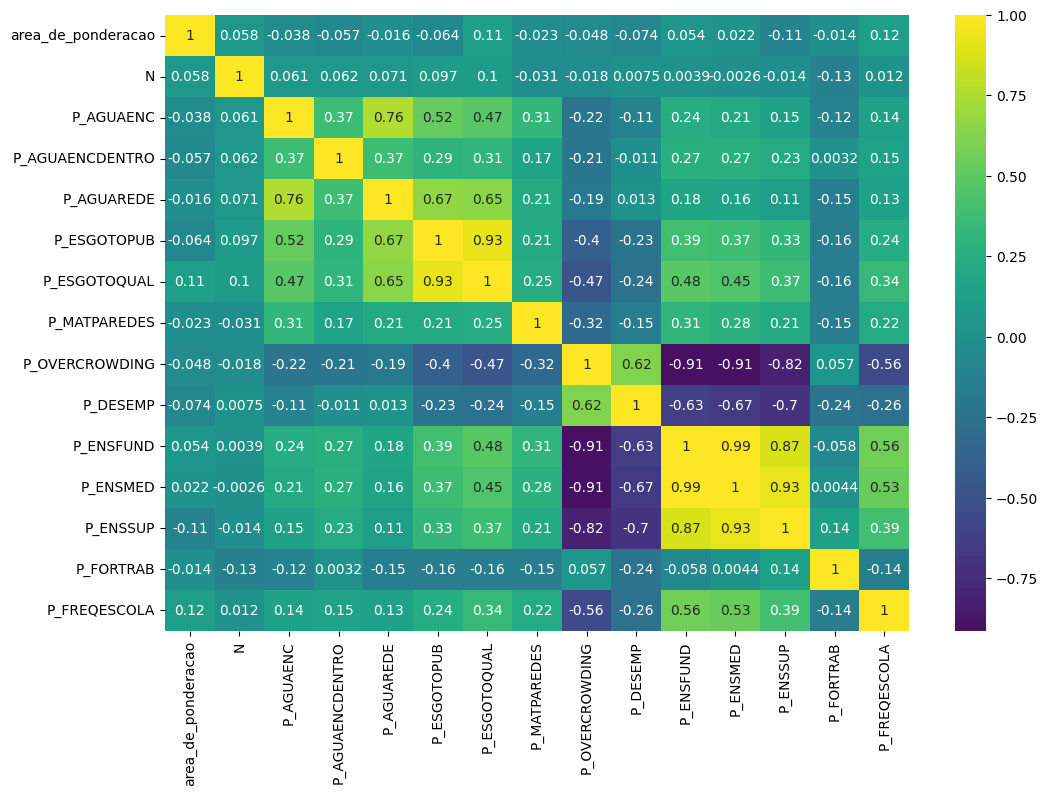

In [156]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='viridis', center=0)
plt.show()

# PCA por dimensão

In [2]:
# Definindo as colunas para cada dimensão
saneamento_cols = ['P_AGUAENC', 'P_AGUAENCDENTRO', 'P_AGUAREDE', 'P_ESGOTOPUB', 'P_ESGOTOQUAL']
moradia_cols = ['P_MATPAREDES', 'P_OVERCROWDING']
emprego_cols = ['P_DESEMP', 'P_FORTRAB']
educacao_cols = ['P_FREQESCOLA', 'P_ENSFUND', 'P_ENSMED', 'P_ENSSUP']

# Normalizando os dados para cada dimensão
saneamento_data = StandardScaler().fit_transform(data[saneamento_cols])
moradia_data = StandardScaler().fit_transform(data[moradia_cols])
emprego_data = StandardScaler().fit_transform(data[emprego_cols])
educacao_data = StandardScaler().fit_transform(data[educacao_cols])

# Aplicando PCA para cada dimensão
pca_saneamento = PCA().fit(saneamento_data)
pca_moradia = PCA().fit(moradia_data)
pca_emprego = PCA().fit(emprego_data)
pca_educacao = PCA().fit(educacao_data)

# Extraindo informações da PCA para cada dimensão
explained_variance_saneamento, loadings_saneamento = get_pca_info(pca_saneamento, saneamento_cols)
explained_variance_moradia, loadings_moradia = get_pca_info(pca_moradia, moradia_cols)
explained_variance_emprego, loadings_emprego = get_pca_info(pca_emprego, emprego_cols)
explained_variance_educacao, loadings_educacao = get_pca_info(pca_educacao, educacao_cols)

(explained_variance_saneamento, loadings_saneamento.head(),
 explained_variance_moradia, loadings_moradia.head(),
 explained_variance_emprego, loadings_emprego.head(),
 explained_variance_educacao, loadings_educacao.head())


(array([0.6413851 , 0.17128074, 0.13066179, 0.04233319, 0.01433919]),
    P_AGUAENC  P_AGUAENCDENTRO  P_AGUAREDE  P_ESGOTOPUB  P_ESGOTOQUAL
 0  -0.438369        -0.287567   -0.492282    -0.495578     -0.487030
 1  -0.239088        -0.818667   -0.043293     0.369575      0.366281
 2  -0.632966         0.496030   -0.372961     0.281526      0.367359
 3   0.585220        -0.008753   -0.784458     0.189465      0.078547
 4  -0.086839         0.031115    0.036194     0.708988     -0.698224,
 array([0.66189722, 0.33810278]),
    P_MATPAREDES  P_OVERCROWDING
 0     -0.707107        0.707107
 1     -0.707107       -0.707107,
 array([0.61863333, 0.38136667]),
    P_DESEMP  P_FORTRAB
 0 -0.707107   0.707107
 1  0.707107   0.707107,
 array([0.798621  , 0.17181046, 0.02808607, 0.00148246]),
    P_FREQESCOLA  P_ENSFUND  P_ENSMED  P_ENSSUP
 0     -0.364954  -0.545847 -0.551425 -0.514577
 1     -0.911024   0.098157  0.165419  0.364741
 2      0.191819  -0.593454 -0.235154  0.745467
 3      0.006943  

In [ ]:
# Dados de variância explicada e loadings para cada dimensão
explained_variance_saneamento = [0.6413851, 0.17128074, 0.13066179, 0.04233319, 0.01433919]
loadings_saneamento = pd.DataFrame({'P_AGUAENC': [-0.438369, -0.239088, -0.632966, 0.585220, -0.086839],
                                    'P_AGUAENCDENTRO': [-0.287567, -0.818667, 0.496030, -0.008753, 0.031115],
                                    'P_AGUAREDE': [-0.492282, -0.043293, -0.372961, -0.784458, 0.036194],
                                    'P_ESGOTOPUB': [-0.495578, 0.369575, 0.281526, 0.189465, 0.708988],
                                    'P_ESGOTOQUAL': [-0.487030, 0.366281, 0.367359, 0.078547, -0.698224]})

explained_variance_moradia = [0.66189722, 0.33810278]
loadings_moradia = pd.DataFrame({'P_MATPAREDES': [-0.707107, -0.707107],
                                 'P_OVERCROWDING': [0.707107, -0.707107]})

explained_variance_emprego = [0.61863333, 0.38136667]
loadings_emprego = pd.DataFrame({'P_DESEMP': [-0.707107, 0.707107],
                                 'P_FORTRAB': [0.707107, 0.707107]})

explained_variance_educacao = [0.798621, 0.17181046, 0.02808607, 0.00148246]
loadings_educacao = pd.DataFrame({'P_FREQESCOLA': [-0.364954, -0.911024, 0.191819, 0.006943],
                                  'P_ENSFUND': [-0.545847, 0.098157, -0.593454, 0.583291],
                                  'P_ENSMED': [-0.551425, 0.165419, -0.235154, -0.783115],
                                  'P_ENSSUP': [-0.514577, 0.364741, 0.745467, 0.215532]})

## Gráficos variância por dimensão

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


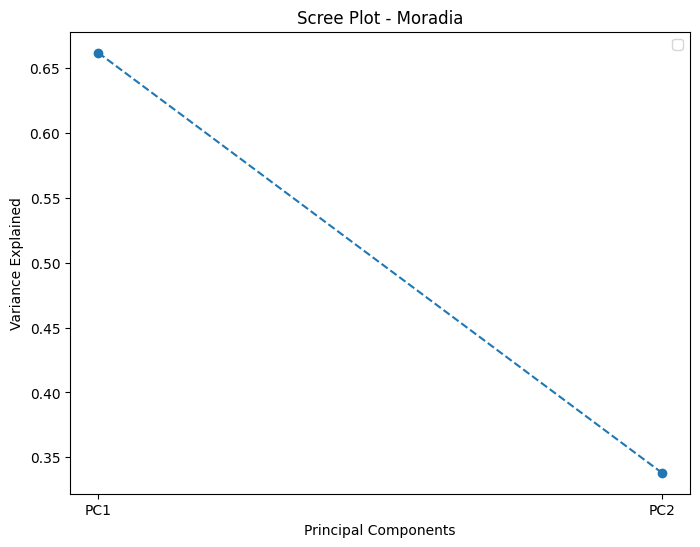

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


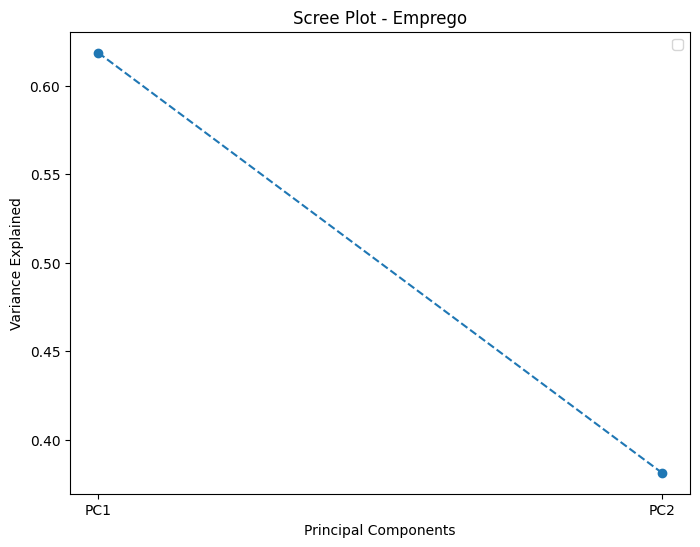

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


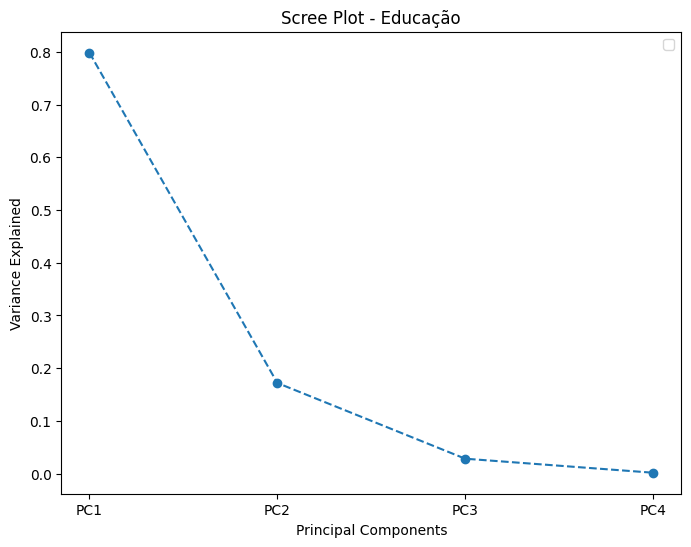

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


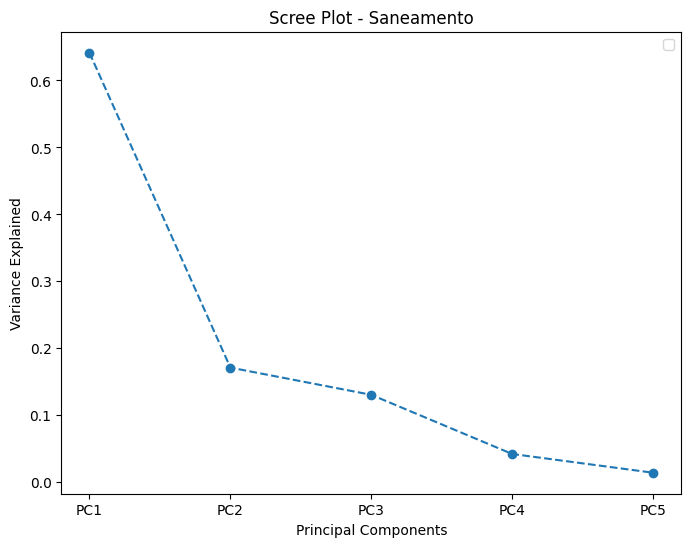

In [247]:
plot_scree_plot(explained_variance_moradia, "Moradia")
plot_scree_plot(explained_variance_emprego, "Emprego")
plot_scree_plot(explained_variance_educacao, "Educação")
plot_scree_plot(explained_variance_saneamento, "Saneamento")

## Gráficos Loadings por dimensão

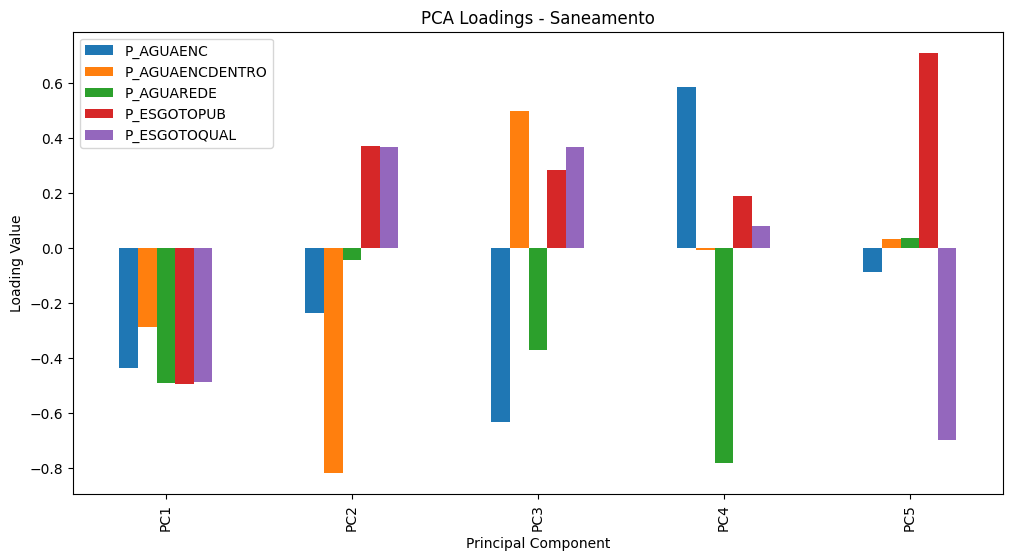

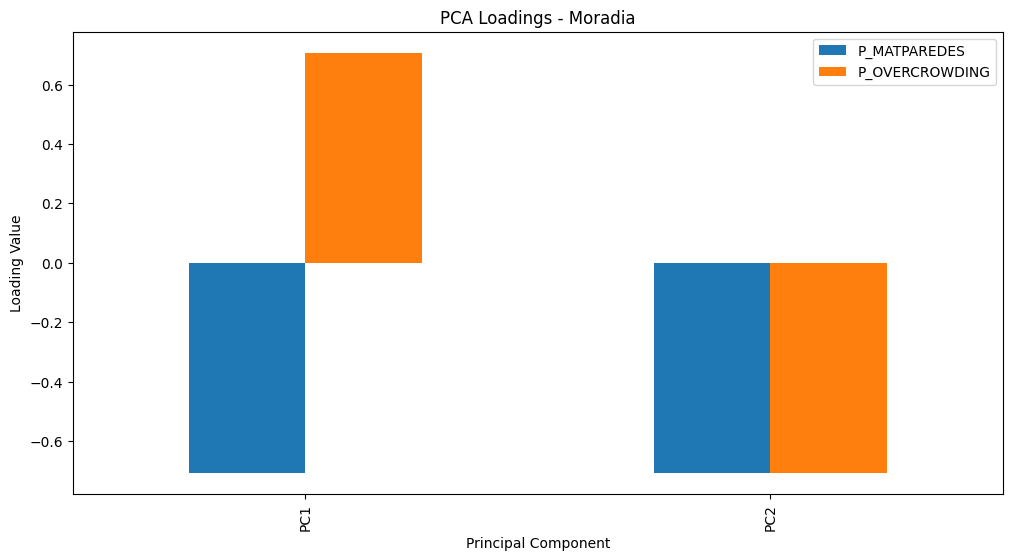

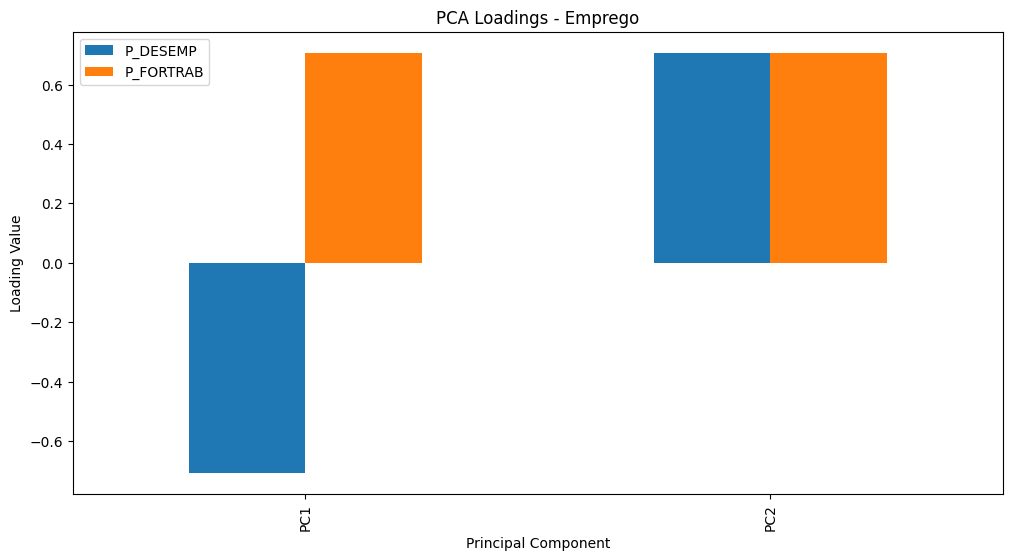

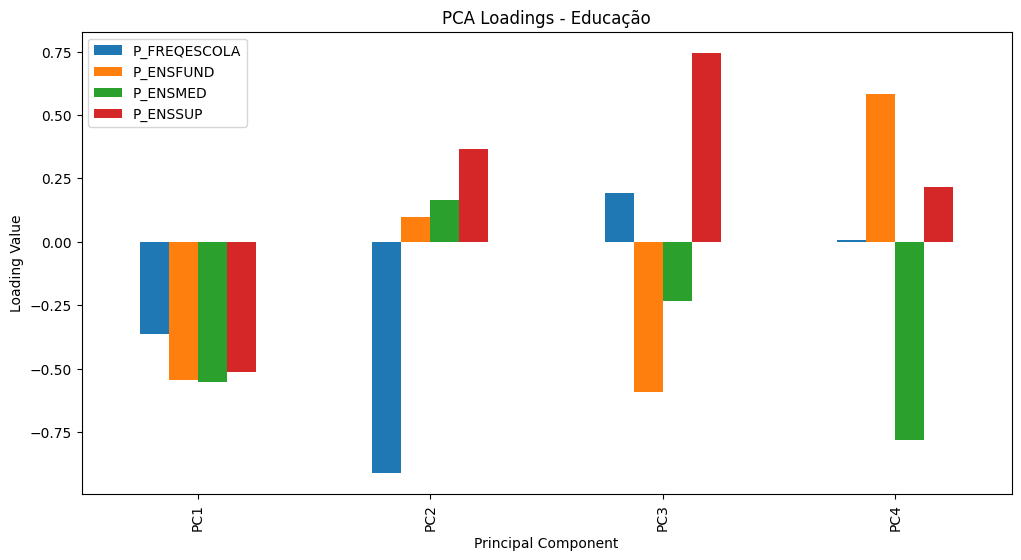

In [248]:
plot_loadings(loadings_saneamento, "Saneamento")
plot_loadings(loadings_moradia, "Moradia")
plot_loadings(loadings_emprego, "Emprego")
plot_loadings(loadings_educacao, "Educação")

## Todas as dimensões

In [ ]:
pca_columns = data.columns[3:]  # Ajuste para incluir todas as colunas relevantes
all_data = data[pca_columns]
all_data_normalized = StandardScaler().fit_transform(all_data)

# Aplicando PCA
pca = PCA()
principal_components = pca.fit_transform(all_data_normalized)
explained_variance = pca.explained_variance_ratio_
loadings = pd.DataFrame(pca.components_, columns=pca_columns)

# Definindo os rótulos dos componentes
component_labels = ['PC' + str(i+1) for i in range(len(principal_components[0]))]
variable_labels = pca_columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


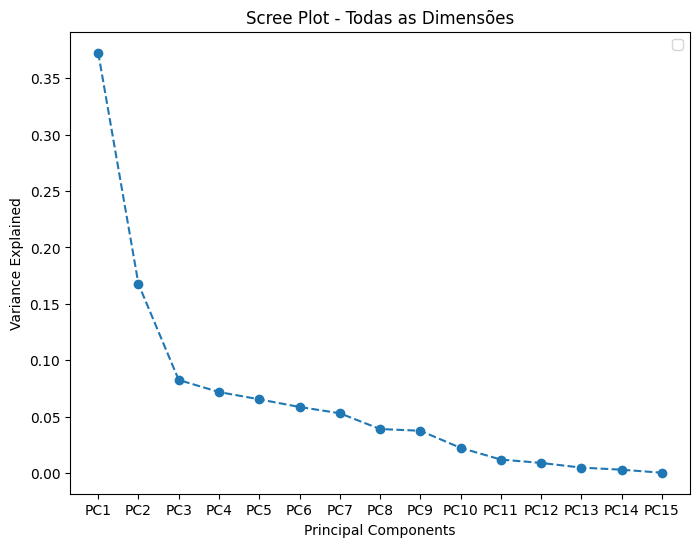

In [127]:
plot_scree_plot(explained_variance, 'Todas as Dimensões')

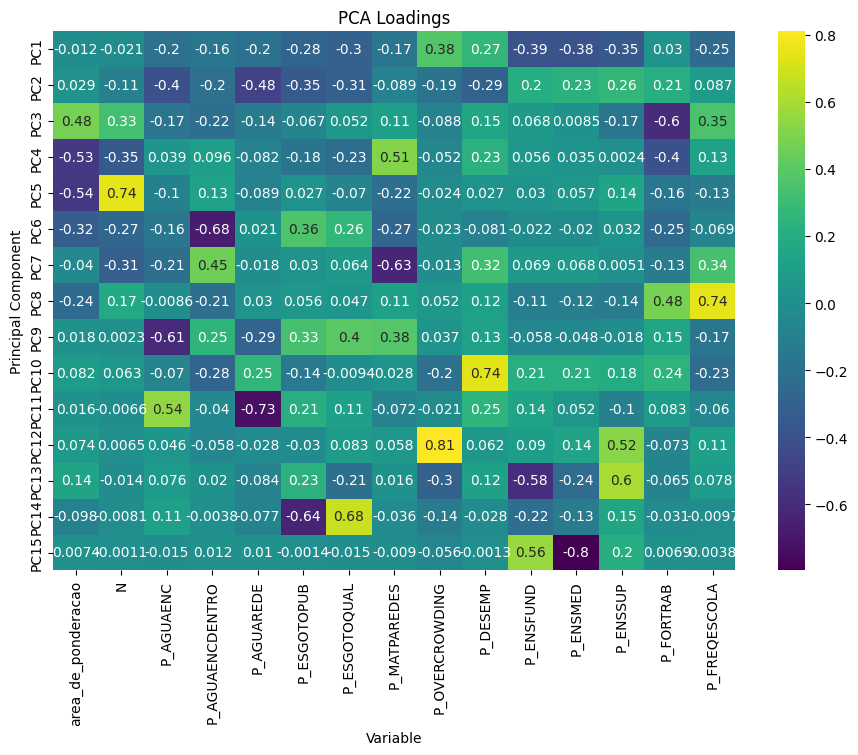

In [140]:
plot_loadings_heatmap(loadings, component_labels, variable_labels)

In [129]:
loadings

,area_de_ponderacao,N,P_AGUAENC,P_AGUAENCDENTRO,P_AGUAREDE,P_ESGOTOPUB,P_ESGOTOQUAL,P_MATPAREDES,P_OVERCROWDING,P_DESEMP,P_ENSFUND,P_ENSMED,P_ENSSUP,P_FORTRAB,P_FREQESCOLA
0,-0.011776,-0.021257,-0.203333,-0.164634,-0.199020,-0.280758,-0.304504,-0.170913,0.375167,0.265810,-0.385602,-0.383835,-0.349053,0.030221,-0.245802
1,0.028748,-0.106207,-0.398820,-0.204769,-0.478108,-0.348063,-0.307990,-0.089476,-0.186109,-0.293651,0.195930,0.229003,0.264919,0.211967,0.086585
2,0.476012,0.329723,-0.169866,-0.220403,-0.135616,-0.066712,0.052415,0.108209,-0.087794,0.152478,0.068421,0.008543,-0.165125,-0.601765,0.353364
3,-0.530273,-0.348688,0.039292,0.095885,-0.082320,-0.176798,-0.227398,0.511037,-0.051837,0.230908,0.055952,0.034795,0.002423,-0.397944,0.129903
4,-0.537170,0.744439,-0.100032,0.131465,-0.088584,0.026959,-0.070442,-0.220452,-0.024212,0.026531,0.030240,0.057485,0.139682,-0.163796,-0.126433
5,-0.320965,-0.265698,-0.159828,-0.677270,0.021098,0.358715,0.259369,-0.267656,-0.022613,-0.081417,-0.022169,-0.020483,0.031689,-0.245607,-0.068815
6,-0.039759,-0.314475,-0.214857,0.453359,-0.017955,0.029980,0.064350,-0.632780,-0.012747,0.321769,0.068909,0.067800,0.005100,-0.129008,0.335174
7,-0.238946,0.173098,-0.008581,-0.214230,0.030155,0.055697,0.047059,0.114190,0.052026,0.118077,-0.113689,-0.119073,-0.135799,0.480627,0.744655
8,0.017747,0.002326,-0.605380,0.250754,-0.285577,0.334226,0.396218,0.380975,0.037474,0.129032,-0.058262,-0.048454,-0.017578,0.151273,-0.167141
9,0.082226,0.062943,-0.069644,-0.278253,0.251857,-0.137987,-0.009365,0.028490,-0.203934,0.738445,0.213101,0.213443,0.183748,0.241739,-0.231452


In [43]:
explained_variance

array([3.99248164e-01, 1.79451852e-01, 8.48105170e-02, 7.35196128e-02,
       6.41650993e-02, 5.68848562e-02, 4.38412447e-02, 4.02359151e-02,
       2.43167628e-02, 1.28858975e-02, 1.01558045e-02, 6.54151364e-03,
       3.58166159e-03, 3.61099265e-04])

# Análise fatorial EFA

In [172]:
# Selecionando as colunas para cada dimensão
# Definindo as colunas para cada dimensão, como fornecido anteriormente.
dimensoes = {"Saneamento": ['P_AGUAENC', 'P_AGUAENCDENTRO', 'P_AGUAREDE', 'P_ESGOTOPUB', 'P_ESGOTOQUAL'],
             "Moradia": ['P_MATPAREDES', 'P_OVERCROWDING'],
             "Emprego": ['P_DESEMP', 'P_FORTRAB'],
             "Educacao": ['P_FREQESCOLA', 'P_ENSFUND', 'P_ENSMED', 'P_ENSSUP']}

# Dicionário para armazenar os resultados da EFA para cada dimensão
efa_results = {}

# Realizando EFA para cada dimensão
for dimensao, variaveis in dimensoes.items():
    # Selecionando e normalizando os dados para a dimensão atual
    dimensao_data = data[variaveis]
    dimensao_data_normalized = StandardScaler().fit_transform(dimensao_data)

    # Aplicando Análise Fatorial Exploratória
    fa = FactorAnalyzer(rotation=None, n_factors=len(variaveis), method='minres')
    fa.fit(dimensao_data_normalized)

    # Armazenando os resultados
    efa_results[dimensao] = {
        "loadings": fa.loadings_,
        "variance": fa.get_factor_variance(),
        "cumulative_variance": fa.get_factor_variance()[2]
    }

efa_results["Saneamento"]["loadings"], efa_results["Saneamento"]["cumulative_variance"]  
efa_results["Moradia"]["loadings"], efa_results["Moradia"]["cumulative_variance"] 
efa_results["Emprego"]["loadings"], efa_results["Emprego"]["cumulative_variance"] 
efa_results["Educacao"]["loadings"], efa_results["Educacao"]["cumulative_variance"] 

(array([[ 0.53493447,  0.34757695,  0.09104586,  0.        ],
        [ 0.98584557,  0.123362  , -0.0888429 ,  0.        ],
        [ 0.99731289,  0.00678602, -0.01812729,  0.        ],
        [ 0.93310352, -0.33684854,  0.06104403,  0.        ]]),
 array([0.78084039, 0.84322562, 0.84828496, 0.84828496]))

## Gráficos da variancia por dimensão

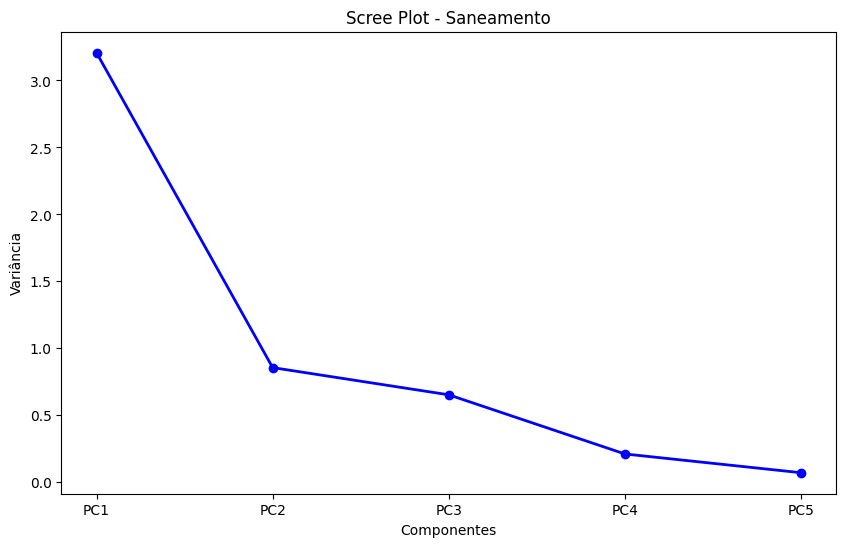

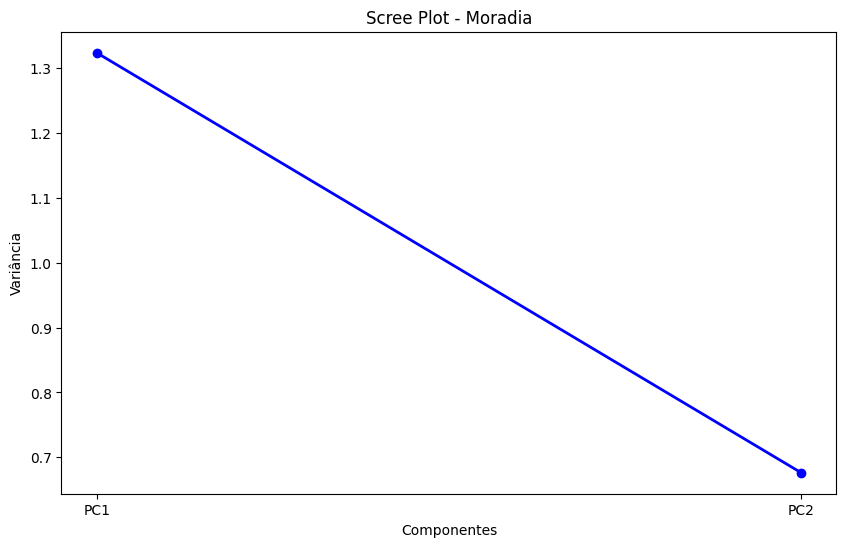

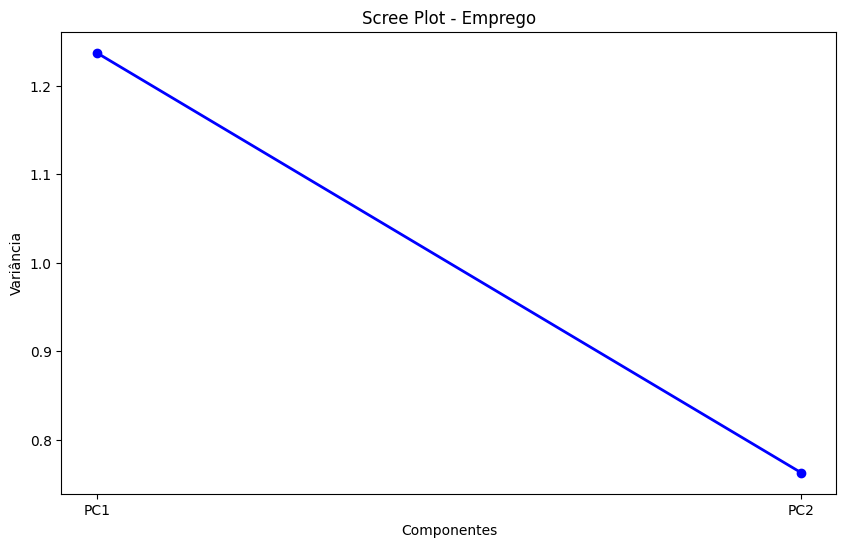

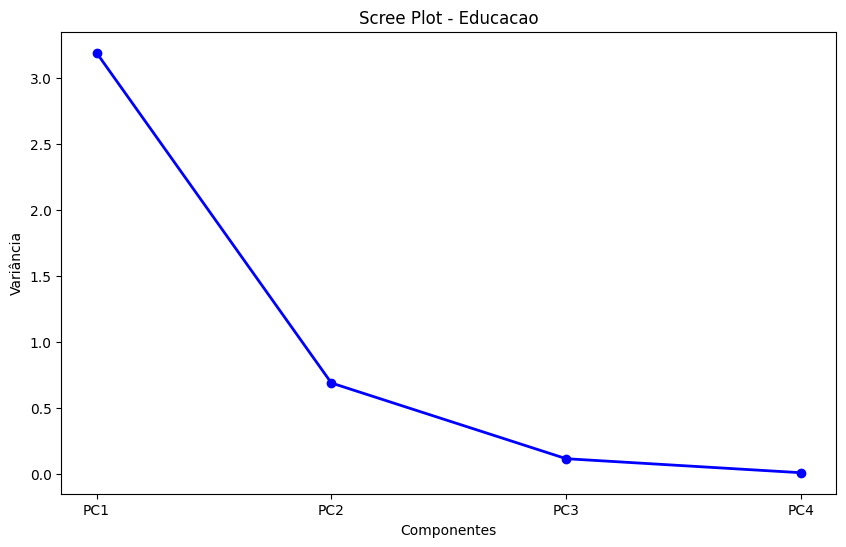

In [186]:
# Criando Scree Plots com identificação dos componentes para cada dimensão.
for dimensao, variaveis in dimensoes.items():
    # Normalizando os dados
    scaler = StandardScaler()
    dimensao_data = data[variaveis]
    dimensao_data_std = scaler.fit_transform(dimensao_data)
    
    # Aplicando a Análise Fatorial Exploratória (EFA)
    fa = FactorAnalyzer(n_factors=len(variaveis), rotation=None, method='minres')
    fa.fit(dimensao_data_std)
    
    # Obtendo a variância explicada por cada componente
    ev, v = fa.get_eigenvalues()
    
    # Criando o Scree Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(variaveis) + 1), ev, 'o-', linewidth=2, color='blue')
    plt.title(f'Scree Plot - {dimensao}')
    plt.xlabel('Componentes')
    plt.ylabel('Variância')
    plt.xticks(range(1, len(variaveis) + 1), [f'PC{i}' for i in range(1, len(variaveis) + 1)])
    #plt.axhline(1, color='red', linestyle='--')
    #plt.grid(True)
    plt.show()

## Heatmap pesos fatoriais por dimensão

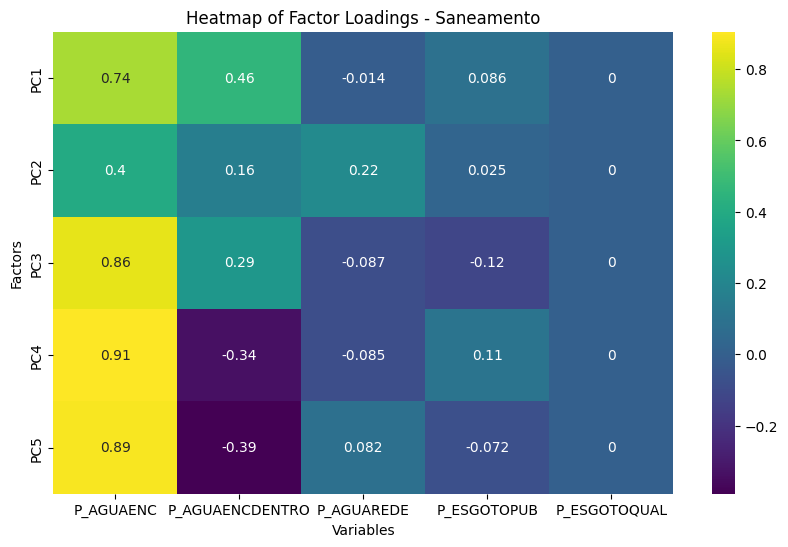

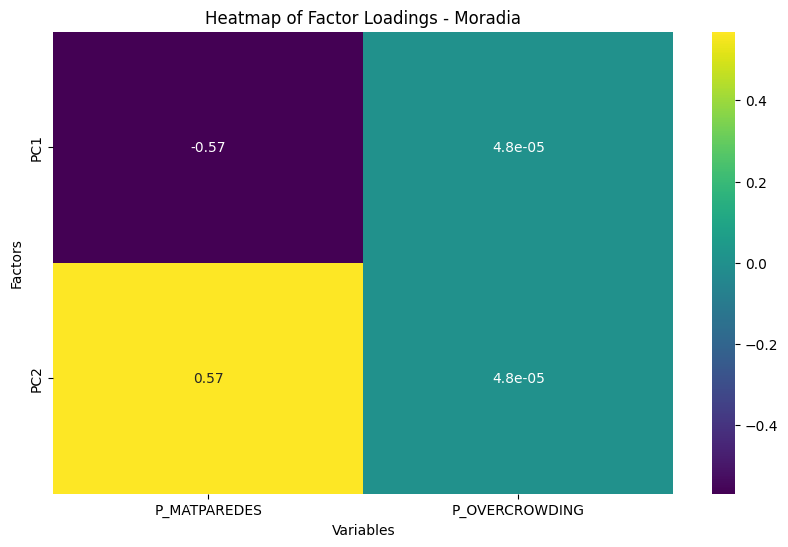

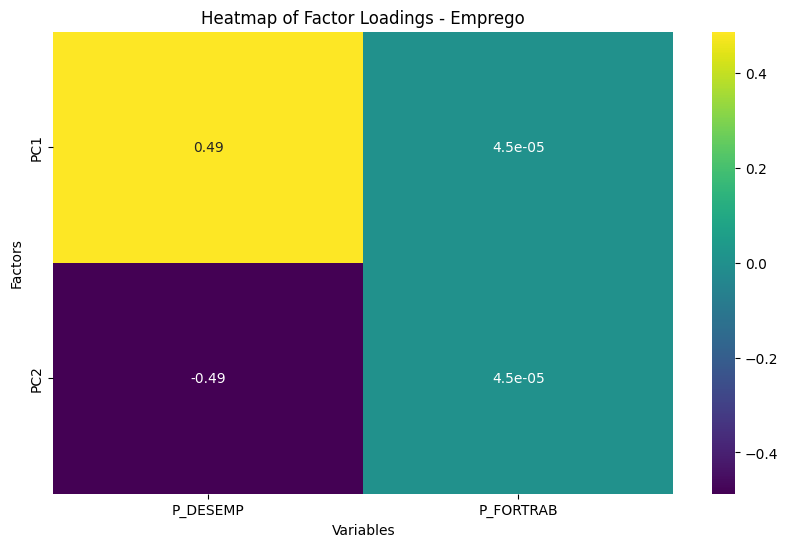

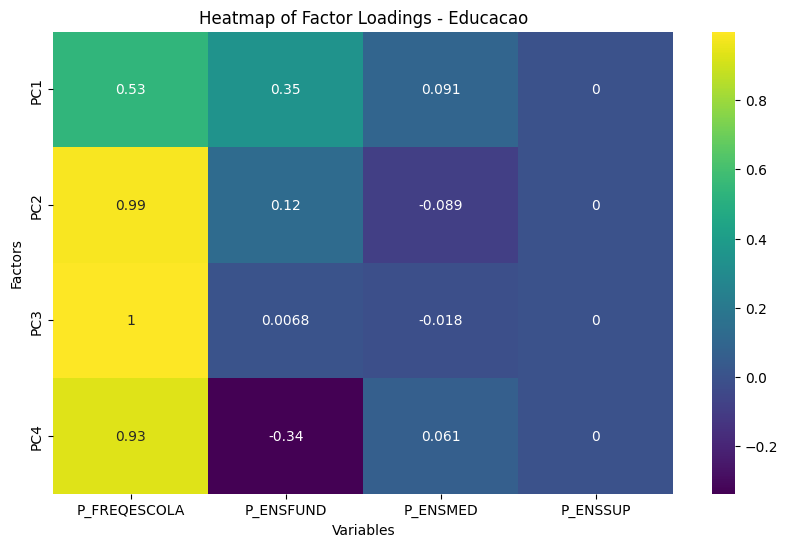

In [263]:
# Criando Heatmaps dos Factor Loadings para cada dimensão.
for dimensao, variaveis in dimensoes.items():
    # Normalizando os dados
    scaler = StandardScaler()
    dimensao_data = data[variaveis]
    dimensao_data_std = scaler.fit_transform(dimensao_data)
    
    # Aplicando a Análise Fatorial Exploratória (EFA)
    fa = FactorAnalyzer(n_factors=len(variaveis), rotation=None, method='minres')
    fa.fit(dimensao_data_std)
    
    # Criando o Heatmap dos Factor Loadings
    plt.figure(figsize=(10, 6))
    sns.heatmap(fa.loadings_, annot=True, cmap='viridis', 
                yticklabels=[f'PC{i+1}' for i in range(len(variaveis))],
                xticklabels=variaveis)
    plt.title(f'Heatmap of Factor Loadings - {dimensao}')
    plt.xlabel('Variables')
    plt.ylabel('Factors')
    plt.show()

In [198]:
ev

array([5.59010925e+00, 2.51355365e+00, 1.23835284e+00, 1.07800459e+00,
       9.81065160e-01, 8.79464406e-01, 7.95990760e-01, 5.86023091e-01,
       5.63229892e-01, 3.35544401e-01, 1.80108493e-01, 1.35321111e-01,
       7.30651813e-02, 4.51476968e-02, 5.01946621e-03])

## Todas Dimensões

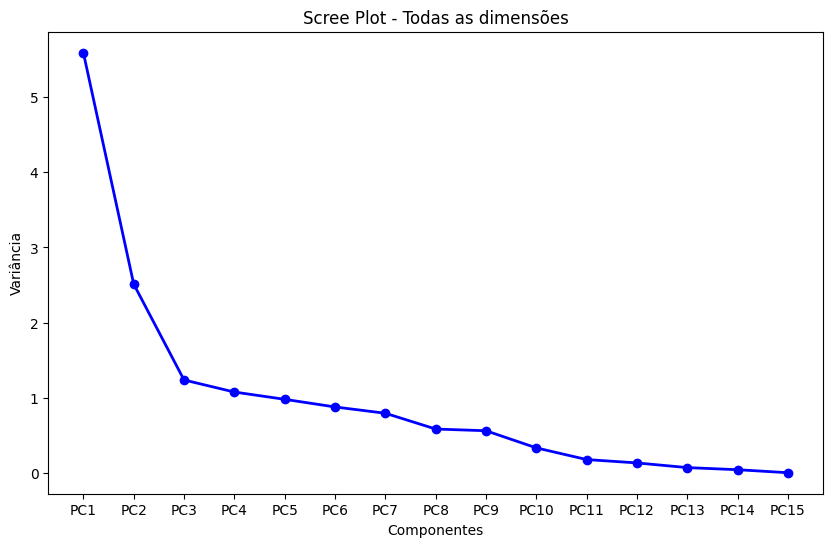

In [196]:
# Combina todas as colunas das diferentes dimensões em uma lista única
todas_as_variaveis =  list(data.columns[3:])

# Normalizando os dados de todas as variáveis
scaler = StandardScaler()
dados_totais = data[todas_as_variaveis]
dados_totais_std = scaler.fit_transform(dados_totais)

# Aplicando a Análise Fatorial Exploratória (EFA) em todos os dados
fa = FactorAnalyzer(n_factors=len(todas_as_variaveis), rotation=None, method='minres')
fa.fit(dados_totais_std)

# Obtendo a variância explicada por cada componente
ev, v = fa.get_eigenvalues()

# Criando o Scree Plot para todos os dados
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(todas_as_variaveis) + 1), ev, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot - Todas as dimensões')
plt.xlabel('Componentes')
plt.ylabel('Variância')
plt.xticks(range(1, len(todas_as_variaveis) + 1), [f'PC{i}' for i in range(1, len(todas_as_variaveis) + 1)])
plt.show()


In [200]:
fa.loadings_

array([[ 2.45479984e-02, -3.14937500e-02, -2.86010392e-01,
        -2.81772327e-01,  5.40998578e-01,  1.46738248e-01,
         5.97161825e-02,  4.36740896e-03,  6.22808900e-02,
         3.67261645e-02, -2.43220573e-02, -5.61385423e-02,
         2.15048214e-02,  2.77435413e-02,  0.00000000e+00],
       [ 4.35961359e-02,  1.17381890e-01, -1.36896722e-01,
        -8.83732870e-02,  3.14494891e-03,  1.40139545e-01,
        -3.73125389e-01,  2.70129383e-01, -8.01292446e-02,
         8.88794320e-02,  7.56404019e-02,  3.02986763e-02,
         9.22175075e-03, -7.07276370e-04,  0.00000000e+00],
       [ 4.69203463e-01,  6.14218611e-01,  2.03928556e-01,
         3.13975128e-01,  2.62792449e-01, -9.91801430e-02,
        -1.55598009e-01, -6.03311094e-02,  1.53544699e-02,
        -9.40523839e-02,  9.65504408e-02, -7.72230384e-02,
        -2.65124610e-02, -8.37023950e-03,  0.00000000e+00],
       [ 3.56405056e-01,  2.64241920e-01,  1.29663435e-01,
         2.69373789e-01, -2.03176334e-02,  4.09165336

In [253]:
all_data_normalized = StandardScaler().fit_transform(data[pca_columns])

# Determinar o número de fatores (geralmente menor que o número de variáveis)
n_factors = min(len(pca_columns), all_data_normalized.shape[1])
fa = FactorAnalyzer(rotation=None, n_factors=n_factors, method='minres')
fa.fit(all_data_normalized)

loadings_all = fa.loadings_
variance_all = fa.get_factor_variance()

# Supondo que 'loadings_all' é um array numpy com as cargas fatoriais
# e 'pca_columns' é a lista dos nomes das variáveis
loadings_df = pd.DataFrame(loadings_all, columns=pca_columns)

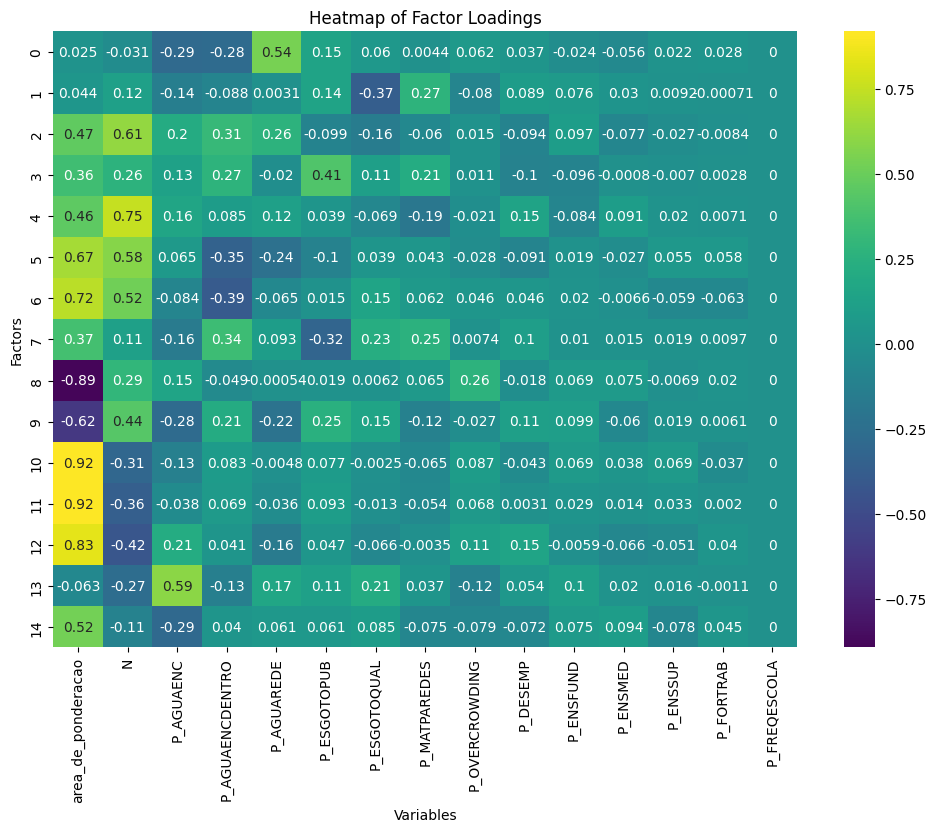

In [257]:
# Chame a função para plotar o heatmap
plot_loadings_heatmap_factor(loadings_df)

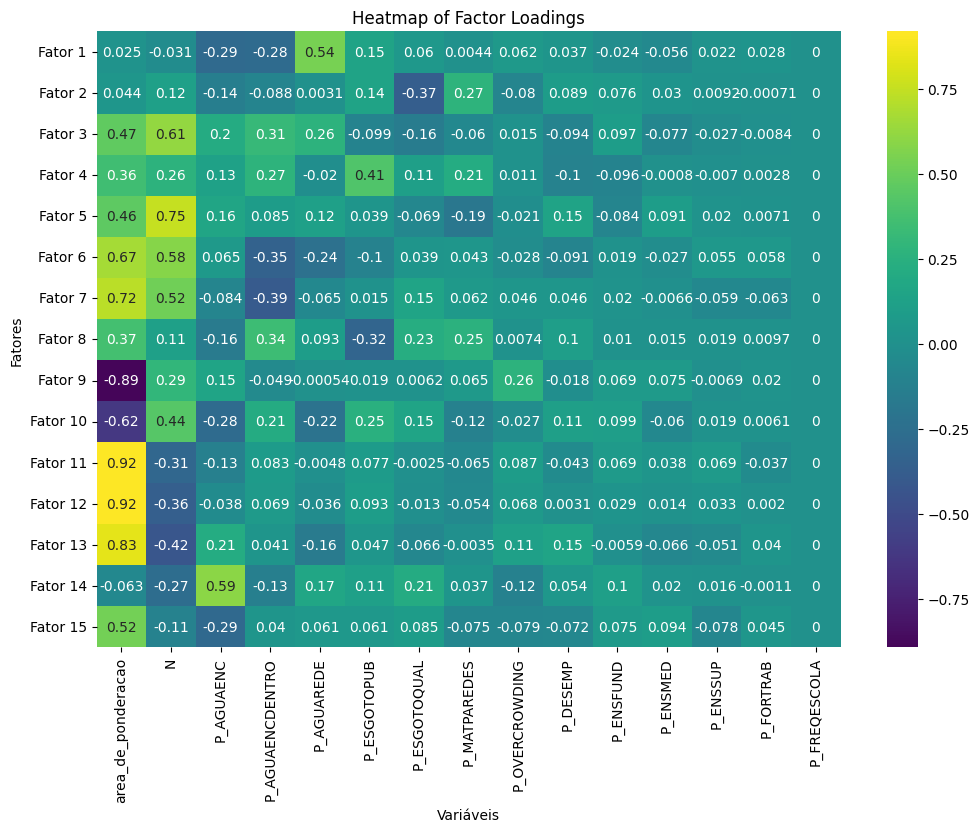

In [261]:
variaveis =  ['area_de_ponderacao',
 'N',
 'P_AGUAENC',
 'P_AGUAENCDENTRO',
 'P_AGUAREDE',
 'P_ESGOTOPUB',
 'P_ESGOTOQUAL',
 'P_MATPAREDES',
 'P_OVERCROWDING',
 'P_DESEMP',
 'P_ENSFUND',
 'P_ENSMED',
 'P_ENSSUP',
 'P_FORTRAB',
 'P_FREQESCOLA']
# Chame a função para plotar o heatmap
# Certifique-se de que 'fa.loadings_' é um DataFrame com os loadings da sua EFA
# e que 'variaveis' é a lista das colunas utilizadas na EFA
plot_loadings_heatmap_dimensao(fa.loadings_, variaveis)


In [205]:
ev

array([5.59010925e+00, 2.51355365e+00, 1.23835284e+00, 1.07800459e+00,
       9.81065160e-01, 8.79464406e-01, 7.95990760e-01, 5.86023091e-01,
       5.63229892e-01, 3.35544401e-01, 1.80108493e-01, 1.35321111e-01,
       7.30651813e-02, 4.51476968e-02, 5.01946621e-03])

In [204]:
fa.loadings_

array([[ 2.45479984e-02, -3.14937500e-02, -2.86010392e-01,
        -2.81772327e-01,  5.40998578e-01,  1.46738248e-01,
         5.97161825e-02,  4.36740896e-03,  6.22808900e-02,
         3.67261645e-02, -2.43220573e-02, -5.61385423e-02,
         2.15048214e-02,  2.77435413e-02,  0.00000000e+00],
       [ 4.35961359e-02,  1.17381890e-01, -1.36896722e-01,
        -8.83732870e-02,  3.14494891e-03,  1.40139545e-01,
        -3.73125389e-01,  2.70129383e-01, -8.01292446e-02,
         8.88794320e-02,  7.56404019e-02,  3.02986763e-02,
         9.22175075e-03, -7.07276370e-04,  0.00000000e+00],
       [ 4.69203463e-01,  6.14218611e-01,  2.03928556e-01,
         3.13975128e-01,  2.62792449e-01, -9.91801430e-02,
        -1.55598009e-01, -6.03311094e-02,  1.53544699e-02,
        -9.40523839e-02,  9.65504408e-02, -7.72230384e-02,
        -2.65124610e-02, -8.37023950e-03,  0.00000000e+00],
       [ 3.56405056e-01,  2.64241920e-01,  1.29663435e-01,
         2.69373789e-01, -2.03176334e-02,  4.09165336

# Criando Índice utilizando PCA

In [60]:

# Selecionando um indicador de cada dimensão
indicadores = {'P_ESGOTOPUB': 'Saneamento',  # Proporção de domicílios com acesso à rede pública de esgoto
               'P_MATPAREDES': 'Moradia',    # Proporção de domicílios com paredes de materiais duráveis
               'P_DESEMP': 'Emprego',        # Taxa de desemprego
               'P_ENSSUP': 'Educacao' }       # Proporção da população com Ensino Superior completo

indicadores_data = data[list(indicadores.keys())]

# Normalizando os dados
scaler = StandardScaler()
indicadores_normalized = scaler.fit_transform(indicadores_data)

# Aplicando PCA
pca = PCA(n_components=1)  # Utilizando apenas o primeiro componente
indice_socioeconomico = pca.fit_transform(indicadores_normalized)

# Exibindo os resultados
loadings = pca.components_
variance_explained = pca.explained_variance_ratio_

loadings, variance_explained, indice_socioeconomico[:10]  # Mostrando os primeiros 10 valores do índice

(array([[-0.41034649, -0.30830242,  0.58924401, -0.62398468]]),
 array([0.49515757]),
 array([[ 1.41715665],
        [-2.12059131],
        [-2.93653491],
        [ 1.49253351],
        [ 1.86201384],
        [ 1.10020568],
        [ 1.59448764],
        [ 1.11249476],
        [ 1.92249306],
        [ 0.88677156]]))

## Gráfico indicando o peso de cada variável na composição do indicador

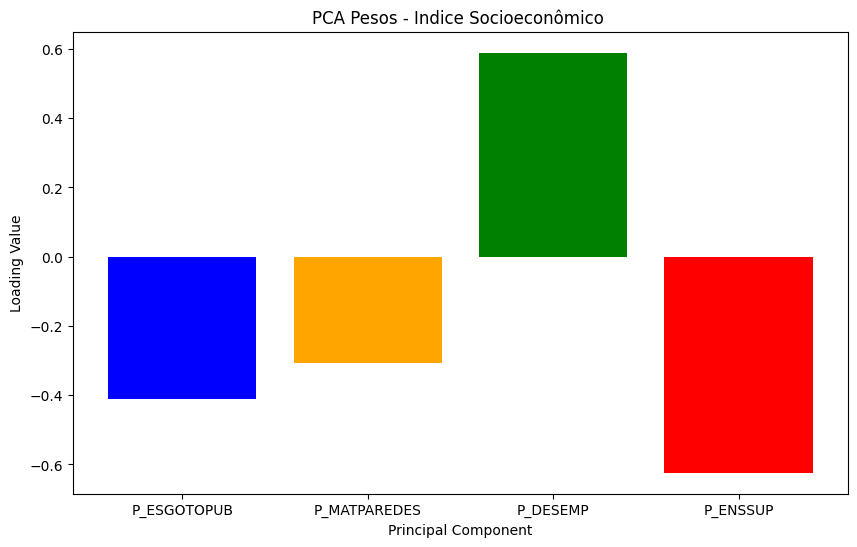

In [212]:
variable_names = ['P_ESGOTOPUB', 'P_MATPAREDES', 'P_DESEMP', 'P_ENSSUP']

# Loadings do seu PCA para PC1
loadings = np.array([-0.41034649, -0.30830242, 0.58924401, -0.62398468])

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(variable_names, loadings, color=['blue', 'orange', 'green', 'red'])

plt.title('PCA Pesos - Indice Socioeconômico ')
plt.xlabel('Principal Component')
plt.ylabel('Loading Value')

# Exibindo o gráfico
plt.show()

## Explicabilidade do Indicador

In [213]:
variance_explained

array([0.49515757])

## Describe do resultado do indicador

In [220]:
pd.DataFrame(indice_socioeconomico, columns = ["indice_socioeconomico"]).describe()

,indice_socioeconomico
count,200.000
mean,-0.000
std,1.411
min,-3.046
25%,-0.858
50%,0.127
75%,0.923
max,3.370


In [244]:
#acima alto 1.0076373007797061
np.percentile(indice_socioeconomico, 76.3)

# abaixo de 0 baixo # abaixo de 0 baixo
np.percentile(indice_socioeconomico, 45)

#-0.004137867685305564 > 1.0076373007797061 = MEDIO
np.percentile(indice_socioeconomico, 45)

#-0.004137867685305564 > 1.0076373007797061 = MEDIO

1.0076373007797061

### Classificação do resultados do indicadores

In [245]:
# Calculando os percentis
# Até 0 baixo
limite_baixo = np.percentile(indice_socioeconomico, 46)

# de 0 a 1 médio
limite_medio = np.percentile(indice_socioeconomico, 76.3)

#acima de 1 alto

# Classificando cada valor no índice
categorias = []
for valor in indice_socioeconomico:
    if valor <= limite_baixo:
        categorias.append('Baixo')
    elif valor <= limite_medio:
        categorias.append('Médio')
    else:
        categorias.append('Alto')

# categorias contém a classificação de cada valor do índice
print(categorias)

['Alto', 'Baixo', 'Baixo', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Médio', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Médio', 'Alto', 'Alto', 'Médio', 'Baixo', 'Alto', 'Médio', 'Médio', 'Médio', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Médio', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Alto', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Médio', 'Baixo', 'Baixo', 'Baixo', 'Médio', 'Baixo', 'Baixo', 'Médio', 'Alto', 'Baixo', 'Baixo', 'Médio', 'Alto', 'Médio', 'Baixo', 'Médio', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Médio', 'Baixo', 'Médio', 'Baixo', 'Médio', 'Baixo', 'Médio', 'Baixo', 'Baixo', 'Médio', 'Médio', 'Médio', 'Baixo', 'Médio', 'Médio', 'Baixo', 'Médio', 'Médio', '

### Gráfico com o resultado da classificação

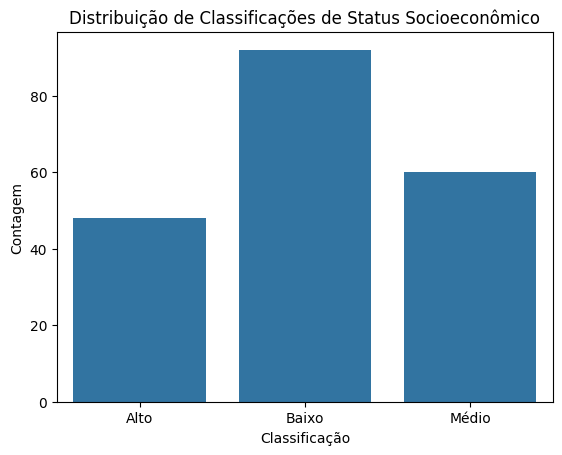

In [246]:
# Criando o gráfico de contagem
sns.countplot(x=categorias)

# Adicionando títulos e rótulos
plt.title('Distribuição de Classificações de Status Socioeconômico')
plt.xlabel('Classificação')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.show()